# HW 4 #
## Due: Nov 5th 11:59 PM ##
## Total points: 80 ##

## Name(s) and EID(s):
Sarthak Shivnani(ss223347) </br>
Shashank Rao (sr55952)

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting.

## Q1. (10 points) Binary Classifier

Consider the Covid-test scenario, where we have a test output Y = $\{0,1\}$ and the true value H = $\{0,1\}$. We also know the sensitivity (ie, $\mathbb{P} (Y=1|H=1)$) to be $87.5\%$ and specificity (ie, $\mathbb{P} (Y=0|H=0)$) to be $97.5\%$. However, the prevalence of Covid in the area of interest (ie, the prior) $\mathbb{P} (H=1)$ is not precisely known, and hence the below question:

a. (5 points) Calculate $\mathbb{P} (H=1|Y=1)$ and $\mathbb{P} (H=1|Y=0)$ for different values of prior $\mathbb{P} (H=1)$ = $\{0.01, 0.1, 0.2, 0.5\}$. Plot them w.r.t the different values of prior.

b. (5 points) There is a cheaper test, with same sensitivity (ie, detects Covid +ve at the same rate) but with a reduced specificity of $90\%$(ie, tells healthy people that they are +ve, with a higher rate). Hence plot the same chart as in part a. with the new value of specificity.



##Part

#Posterior Probability when Y = 1:
P(H = 1 | Y = 1) = P(Y = 1 | H = 1) · P(H = 1) / P(Y = 1)

where
P(Y = 1) = P(Y = 1 | H = 1) · P(H = 1) + P(Y = 1 | H = 0) * P(H = 0)
and P(Y = 1 | H = 0) = 1 - Specificity = 1 - 0.975 = 0.025.
# Posterior Probability when Y = 0:
P(H = 1 | Y = 0) = P(Y = 0 | H = 1) * P(H = 1) / P(Y = 0)
where
P(Y = 0) = P(Y = 0 | H = 1) * P(H = 1) + P(Y = 0 | H = 0) * P(H = 0)
and P(Y = 0 | H = 1) = 1 - Sensitivity = 1 - 0.875 = 0.125.

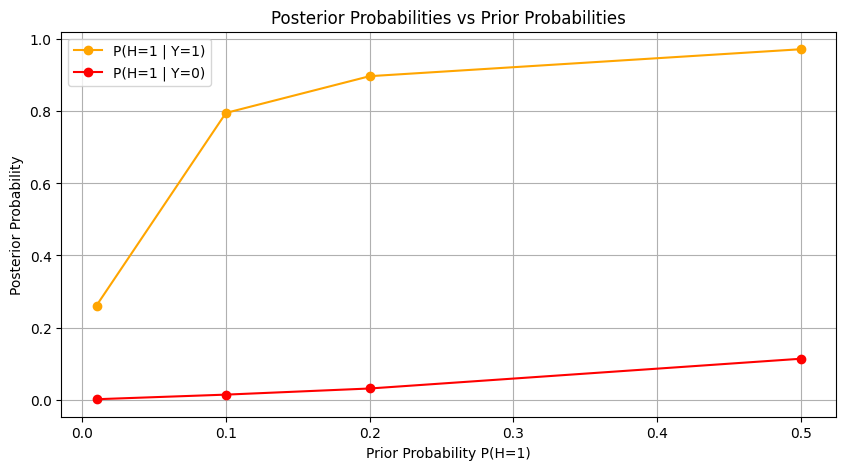

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
sensitivity = 0.875  # P(Y=1 | H=1)
specificity = 0.975  # P(Y=0 | H=0)
false_positive_rate = 1 - specificity  # P(Y=1 | H=0)
false_negative_rate = 1 - sensitivity  # P(Y=0 | H=1)

# Range of prior probabilities P(H=1)
priors = np.array([0.01, 0.1, 0.2, 0.5])

# Function to calculate posterior probabilities using Bayes' theorem
def posterior_prob_y_1(prior):
    # P(Y=1) = P(Y=1|H=1) * P(H=1) + P(Y=1|H=0) * P(H=0)
    P_Y_1 = sensitivity * prior + false_positive_rate * (1 - prior)
    # P(H=1 | Y=1) = (P(Y=1 | H=1) * P(H=1)) / P(Y=1)
    return (sensitivity * prior) / P_Y_1

def posterior_prob_y_0(prior):
    # P(Y=0) = P(Y=0|H=1) * P(H=1) + P(Y=0|H=0) * P(H=0)
    P_Y_0 = false_negative_rate * prior + specificity * (1 - prior)
    # P(H=1 | Y=0) = (P(Y=0 | H=1) * P(H=1)) / P(Y=0)
    return (false_negative_rate * prior) / P_Y_0

# Calculate posterior probabilities for both cases (Y=1 and Y=0)
posteriors_y_1 = [posterior_prob_y_1(p) for p in priors]
posteriors_y_0 = [posterior_prob_y_0(p) for p in priors]

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(priors, posteriors_y_1, marker='o', label='P(H=1 | Y=1)', color='orange')
plt.plot(priors, posteriors_y_0, marker='o', label='P(H=1 | Y=0)', color='red')
plt.xlabel('Prior Probability P(H=1)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities vs Prior Probabilities')
plt.legend()
plt.grid(True)
plt.show()


B) The cheaper test introduces more false positives, making it less reliable in confirming positive cases. However, it retains the same sensitivity, so a negative result is still fairly dependable, although slightly less so compared to the original test. This comparison highlights the trade-off between cost and test accuracy


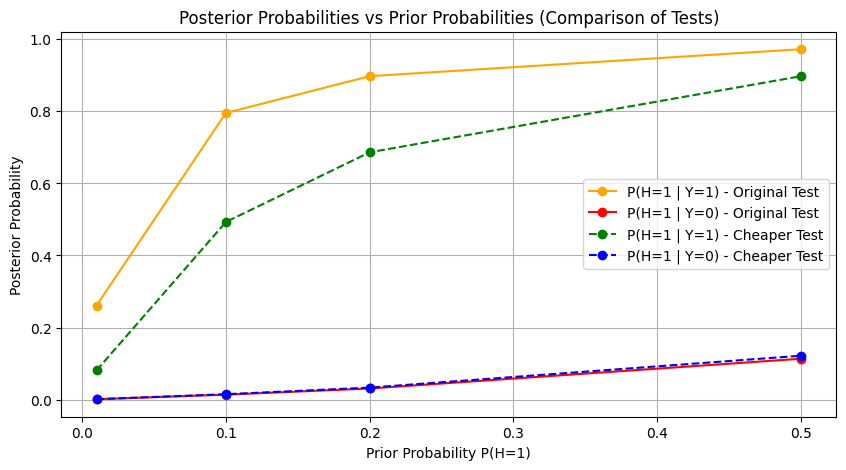

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
sensitivity = 0.875
specificity = 0.975
new_specificity = 0.90

# Calculating false positive rates
false_positive_rate = 1 - specificity  # Original test
new_false_positive_rate = 1 - new_specificity  # Cheaper test

# Calculating false negative rate (same for both tests)
false_negative_rate = 1 - sensitivity  # P(Y=0 | H=1)

# Range of prior probabilities P(H=1)
priors = np.array([0.01, 0.1, 0.2, 0.5])

# Functions to calculate posterior probabilities
def posterior_prob_y_1(specificity, prior):
    P_Y_1 = sensitivity * prior + (1 - specificity) * (1 - prior)
    return (sensitivity * prior) / P_Y_1

def posterior_prob_y_0(specificity, prior):
    P_Y_0 = false_negative_rate * prior + specificity * (1 - prior)
    return (false_negative_rate * prior) / P_Y_0

# Calculate posterior probabilities for both tests
posteriors_y_1_original = [posterior_prob_y_1(specificity, p) for p in priors]
posteriors_y_0_original = [posterior_prob_y_0(specificity, p) for p in priors]

posteriors_y_1_cheaper = [posterior_prob_y_1(new_specificity, p) for p in priors]
posteriors_y_0_cheaper = [posterior_prob_y_0(new_specificity, p) for p in priors]

# Plotting the results
plt.figure(figsize=(10, 5))

# Original test
plt.plot(priors, posteriors_y_1_original, marker='o', label='P(H=1 | Y=1) - Original Test', color='orange')
plt.plot(priors, posteriors_y_0_original, marker='o', label='P(H=1 | Y=0) - Original Test', color='red')

# Cheaper test
plt.plot(priors, posteriors_y_1_cheaper, marker='o', linestyle='--', label='P(H=1 | Y=1) - Cheaper Test', color='green')
plt.plot(priors, posteriors_y_0_cheaper, marker='o', linestyle='--', label='P(H=1 | Y=0) - Cheaper Test', color='blue')

# Adding labels, title, and legend
plt.xlabel('Prior Probability P(H=1)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities vs Prior Probabilities (Comparison of Tests)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Q2. Classification with Skorch (25 points)

In this question we will train and evaluate a simple neural network on a classification dataset using the skorch library. skorch is a scikit-learn compatible neural network library that wraps PyTorch. For more details on how to use the library see [here](https://github.com/skorch-dev/skorch). For this question, we will use a phishing dataset which consists of 11430 URLs with 87 extracted features. The dataset is already preprocessed and provided to you in the file `phishing_dataset.pt`. The dataset is balanced i.e. it contains 50% phishing and 50% legitimate URLs.


In [ ]:
!pip install skorch mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 12.1 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
X_train, y_train, X_train_imbalanced, y_train_imbalanced, X_test, y_test, X_test_imbalanced, y_test_imbalanced = torch.load('/content/phishing_dataset_final.pt')

<ipython-input-3-017192f3d236>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_train, y_train, X_train_imbalanced, y_train_imbalanced, X_test, y_test, X_test_imbalanced, 

## Part 1. (9 points)

In this part we will define our neural network. When building our network we will take as input the following:
1. inp_size: the number of input features
2. hidden_sizes: list of the size of each hidden layer in the network. Note that this does not include the size of the input and output layer. Eg: `[16, 8]` in which case your NN will look like: input_layer -> hidden_layer_1 (size 16) -> hidden_layer_2 (size 8) -> output_layer.
3. num_classes: the number of output classes which is equivalent to the size of the output layer. In our example, we only have 2 classes (phishing, non-phishing).
4. nonlin: the activation function. Eg: `torch.nn.ReLU()`.

The above arguments will be used to initialize our neural network. Notice that we want to be able to initialize an arbitrary size network specified by the hidden_sizes. To do this you must first initialize a `nn.ModuleList()` and append your layer followed by the activation for each specified size. You can refer to [this](https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html) for more help.

You must also define a `forward(X)` function which handles the forward pass of your network. Here `X` is your input and you must return the [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) output tensor from your network in this function.

In [ ]:
class MyModule(nn.Module):
    def __init__(self, inp_size, hidden_sizes, num_classes=2, nonlin=nn.ReLU()):
        super().__init__()
        # define your hidden layers (self.hidden) as a nn.ModuleList() and append your nn.Linear layers based on the hidden_sizes
        ##  START CODE  ##
        self.hidden = nn.ModuleList()
        for i in range(len(hidden_sizes)):
            if i == 0:
                self.hidden.append(nn.Linear(inp_size, hidden_sizes[i]))
            else:
                self.hidden.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        self.nonlin = nonlin
        ##  END CODE  ##

        # define softmax
        ##  START CODE  ## (1 line of code)
        self.softmax = nn.Softmax(dim=1)
        ##  END CODE  ##

    def forward(self, X):
        # calculate the output from your hidden layers
        # Hint: if your hidden layers are in the form of nn.ModuleList(),
        #       you must write a for loop to do a forward pass on all layers in the list
        ##  START CODE  ##
        out = X
        for i in range(len(self.hidden)):
          out = self.hidden[i](out) # Pass the output of the previous layer to the next layer
          out = self.nonlin(out) # apply activation function element-wise
        ##  END CODE  ##

        # calculate softmax on the output
        ##  START CODE  ## (1 line of code)
        out = self.softmax(out)
        ##  END CODE  ##
        return out

## Part 2. (5 points)

In this part we will train and evaluate the neural network on our dataset. Use `X_train` and `y_train` tensors to train the model. Use `X_test` and `y_test` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [ ]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net = NeuralNetClassifier(
    MyModule,
    batch_size=256,
    max_epochs=10,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
# define the parameters you want to search over as a dict
params = {
    'module__inp_size': [X_train.shape[1]],
    'module__hidden_sizes': [[16, 8], [32, 16]],  # Hidden layer sizes (two options)
    'module__nonlin': [nn.ReLU(), nn.Tanh()],  # Activation functions (two options)
    'lr': [0.01, 0.001],  # Learning rates (two options)
    'max_epochs': [10, 20],  # Number of training epochs (two options)
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs = GridSearchCV(net, params, cv=3, scoring='accuracy', refit=True)
##  END CODE  ##

In [ ]:
# train your model
##  START CODE  ## (1 line of code)
gs.fit(X_train, y_train)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

best score: 0.952, best params: {'lr': 0.01, 'max_epochs': 20, 'module__hidden_sizes': [32, 16], 'module__inp_size': 87, 'module__nonlin': ReLU()}


Best Accuracy on Test:  0.9531140657802659
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1433
           1       0.96      0.95      0.95      1425

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      2858
weighted avg       0.95      0.95      0.95      2858



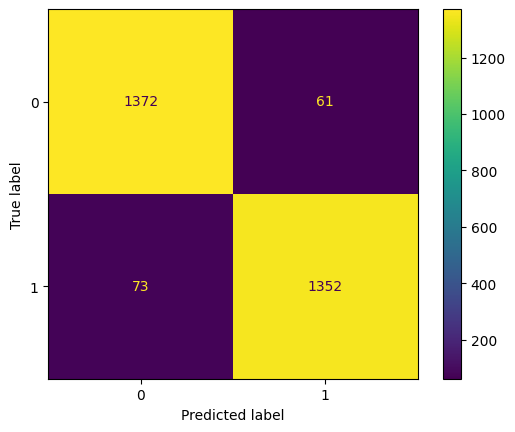

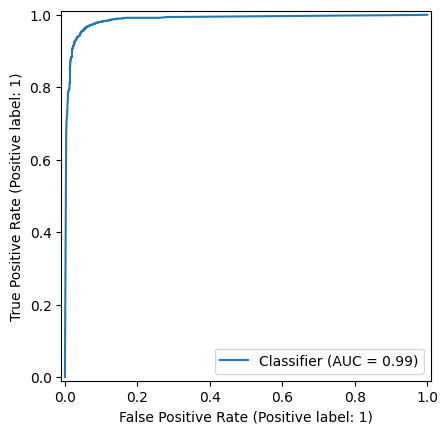

In [ ]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net = gs.best_estimator_
##  END CODE  ##

# get predictions on the test data
##  START CODE  ## (1 line of code)
y_pred_test = net.predict(X_test)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Test: ", accuracy_score(y_test, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=net.classes_)
disp.plot()
##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_predictions(y_test, gs.predict_proba(X_test)[:, 1])
##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test, y_pred_test))
##  END CODE  ##

## Part 3. (5 points)

In this part we will deal with a more realistic scenario. In reality most emails we receieve are non-phishing legitimate emails. Hence in a real world dataset, we can expect that there will be way more datapoints with a negative label than positive. Hence the dataset will be imbalanced.

Use `X_train_imbalanced` and `y_train_imbalanced` tensors to train the model. Use `X_test_imbalanced` and `y_test_imbalanced` tensors to evaluate.  **To get full credit you must obtain an accuracy of 95% or more on the imbalanced test set.** You must use GridSearchCV from sklearn to search the best hyperparameters. Search over atleast 2 values (can be anything of your choice) of the following hyperparams:
1. Learning rate
2. Number of training epochs
3. hidden_sizes which is the input to your neural network you defined above
4. nonlin which is the activation function input to your neural network you defined above

Finally, use sklearn's ConfusionMatrixDisplay and RocCurveDisplay to caluclate and display the confusion matrix and ROC on the imbalanced test set for the best model obtained using the grid search. Also use classification_report to calculate and print the precision and recall values of the positive and negative label.

In [ ]:
# define a NeuralNetClassifier() with batch size 256, torch.optim.Adam optimizer and torch.nn.CrossEntropyLoss as the criterion
# IMPORTANT: also use iterator_train__shuffle=True to shuffle the training data during the training process
##  START CODE  ##
net_imbalanced = NeuralNetClassifier(
    MyModule,
    batch_size=256,
    max_epochs=10,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
    iterator_train__shuffle=True)
##  END CODE  ##

# deactivate skorch-internal train-valid split and verbose logging
net_imbalanced.set_params(train_split=False, verbose=0)

# define the parameters you want to search over as a dict
##  START CODE  ##
params = {
    'module__inp_size': [X_train_imbalanced.shape[1]],
    'module__hidden_sizes': [[16, 8], [32, 16]],  # Hidden layer sizes (two options)
    'module__nonlin': [nn.ReLU(), nn.Tanh()],  # Activation functions (two options)
    'lr': [0.01, 0.001],  # Learning rates (two options)
    'max_epochs': [10, 20],  # Number of training epochs (two options)
}
##  END CODE  ##

# define your GridSearchCV()
# IMPORTANT: use cv=3, scoring='accuracy' (to obtain best model based on accuracy)
# and refit=True (to retrain the model using the best hyperparams for later use i.e. evaluation).
##  START CODE  ## (1 line of code)
gs_imbalanced = GridSearchCV(net_imbalanced, params, cv=3, scoring='accuracy', refit=True)
##  END CODE  ##

In [ ]:
# train your model on the imbalanced train dataset
##  START CODE  ## (1 line of code)
gs_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
##  END CODE  ##

# print best params
print("best score: {:.3f}, best params: {}".format(gs_imbalanced.best_score_, gs_imbalanced.best_params_))

best score: 0.954, best params: {'lr': 0.01, 'max_epochs': 20, 'module__hidden_sizes': [32, 16], 'module__inp_size': 87, 'module__nonlin': ReLU()}


Best Accuracy on Imbalanced Test:  0.9549266247379455
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1433
         1.0       0.93      0.89      0.91       475

    accuracy                           0.95      1908
   macro avg       0.95      0.93      0.94      1908
weighted avg       0.95      0.95      0.95      1908



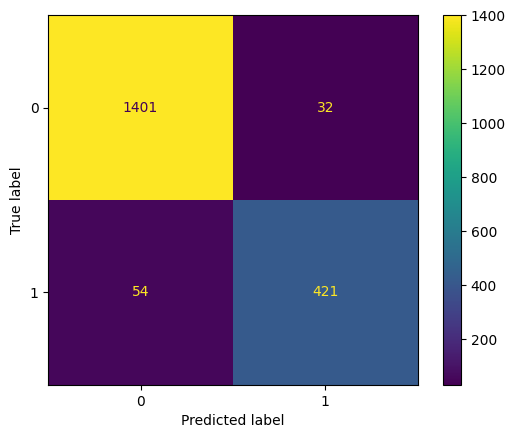

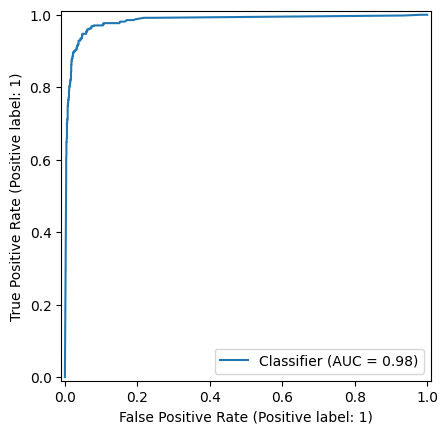

In [ ]:
# Get the best model from your GridSearchCV object.
##  START CODE  ## (1 line of code)
net_imbalanced = gs_imbalanced.best_estimator_
##  END CODE  ##

# get predictions on the imbalanced test data
##  START CODE  ## (1 line of code)
y_pred_test = net_imbalanced.predict(X_test_imbalanced)
##  END CODE  ##

# calculate accuracy and print
print("Best Accuracy on Imbalanced Test: ", accuracy_score(y_test_imbalanced, y_pred_test))

# calculate confusion matrix and use ConfusionMatrixDisplay to display the matrix
##  START CODE  ##
confusion_mat = confusion_matrix(y_test_imbalanced, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=net_imbalanced.classes_)
disp.plot()
##  END CODE  ##

# use RocCurveDisplay to display the roc curve and AUC
##  START CODE  ## (1 line of code)
RocCurveDisplay.from_predictions(y_test_imbalanced, gs_imbalanced.predict_proba(X_test_imbalanced)[:, 1])
##  END CODE  ##

# print sklearn's classification_report which consists of precision and recall for both labels
##  START CODE  ## (1 line of code)
print(classification_report(y_test_imbalanced, y_pred_test))
##  END CODE  ##

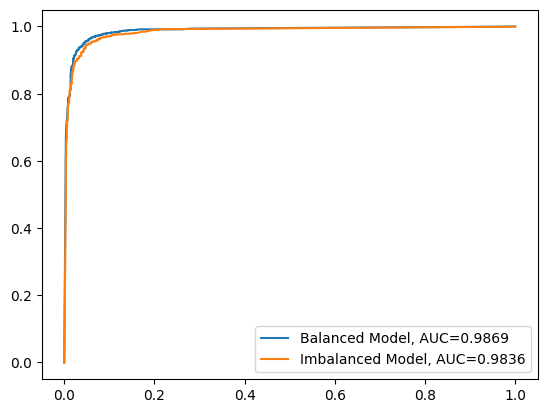

In [ ]:
# do not modify anything here
from sklearn import metrics
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# IMPORTANT: to use this function simply call compare_roc_curves()
def compare_roc_curves():
  y_pred = net.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Balanced Model, AUC="+str(auc))

  y_pred = net_imbalanced.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label="Imbalanced Model, AUC="+str(auc))
  plt.legend()

compare_roc_curves()

## Part 4. (6 points)

Briefly answer the following questions (1 paragraph should suffice):

a. How does the performance (wrt the ROC curve) of the model trained on the imbalanced dataset compare to that of the model trained on the balanced dataset? *(Hint: Use compare_roc_curves() function to plot both ROC curves on the same plot and zoom in on the curved part. Think about it indicates about the decision threshold of the 2 models)* (2 points)

b. Is accuracy the best metric to judge a model performance in this case? When dealing with a phishing dataset which set of metric(s) is most important to get a real sense of the model performance? *(Hint: think about which value in your confusion matrix matters the most and a metric related to that value)* (2 points)

c. What are some techniques to help counter label imbalance in your training set? (2 points)

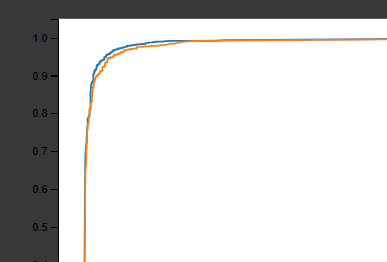

a.  The ROC curve comparison reveals how the models trained on balanced versus imbalanced datasets perform.  The balanced model likely exhibits a more pronounced curve, indicating its ability to discriminate between classes across various decision thresholds. Conversely, the imbalanced model might show a flatter curve, suggesting its sensitivity to the dominant class and a less optimal threshold for accurately classifying the minority class (phishing URLs). The area under the curve (AUC) quantifies this difference.


b. In cases of imbalanced datasets, accuracy is not the most reliable metric, as it can give a falsely high impression when one class is much larger than the other. In phishing detection, reducing false negatives is crucial, making recall (or sensitivity) for the phishing class the top priority. A high recall rate ensures that most phishing sites are flagged, even if it leads to some false positives. Precision is also important to maintain, as it reflects the correctness of the model’s positive predictions and helps prevent too many unnecessary alerts. The F1-score, which combines precision and recall, provides a well-rounded measure of the model’s performance.


c. Several techniques address label imbalance.  Oversampling the minority class (e.g., SMOTE) creates synthetic examples, improving its representation.  Undersampling the majority class reduces its dominance but risks information loss.  Cost-sensitive learning assigns higher misclassification costs to the minority class, encouraging the model to prioritize its correct classification.  Ensemble methods, combining multiple models trained on different subsets or with adjusted weights, can enhance overall performance.


## Answer

# Q3. Logistic Regression and Softmax Classifier (10 points)



## Part 1. (5 points)

We have a dataset $\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_N, y_N) \}$ where $\mathbf{x}_i \in \mathbb{R}^{d}$ and $y_i \in \{1, \ldots, K\}$ for all $i$.  Suppose we have a $K$-way softmax classifier:

\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_k^{\top} \mathbf{x} + b_k )}{\sum_{j=1}^{K} \exp(\mathbf{w}_j^{\top} \mathbf{x} + b_j ) }
\end{equation}

where $\mathbf{w}_k \in \mathbb{R}^d$ and $b_k \in \mathbb{R}$ are the weight and bias parameters from the weight matrix and bias vector:

\begin{equation}
\mathbf{W} = \begin{pmatrix}
                \mathbf{w}_1^\top \\
                \mathbf{w}_2^\top \\
                \vdots \\
                \mathbf{w}_K^\top
            \end{pmatrix}\\
\mathbf{b} = \begin{pmatrix}
                b_1 \\
                b_2 \\
                \vdots \\
                b_K
            \end{pmatrix}
\end{equation}


Show that when $K=2$, this softmax classifier is equivalent to logistic regression.


#Answer
To show that when $K=2$, this softmax classifier is equivalent to logistic regression, let’s proceed as follows:

1. **Set Up the Softmax for $K = 2$:**

   When $K = 2$, we have two classes, and we can denote the probability of each class as:

   \begin{equation}
   P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1)}{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
   \end{equation}

   \begin{equation}
   P(y = 2 \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
   \end{equation}

2. **Express $P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b})$ as a Sigmoid Function:**

   For binary classification, we only need the probability of one class, since the other probability will be $1 - P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b})$. Let's focus on $P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b})$:

   \begin{equation}
   P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1)}{\exp(\mathbf{w}_1^{\top} \mathbf{x} + b_1) + \exp(\mathbf{w}_2^{\top} \mathbf{x} + b_2)}
   \end{equation}

   Define $z = (\mathbf{w}_1 - \mathbf{w}_2)^{\top} \mathbf{x} + (b_1 - b_2)$. Then:

   \begin{equation}
   P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp(z)}{1 + \exp(z)}
   \end{equation}

   This is the form of a sigmoid function:

   \begin{equation}
   P(y = 1 \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \sigma(z) = \frac{1}{1 + \exp(-z)}
   \end{equation}

   where $z = (\mathbf{w}_1 - \mathbf{w}_2)^{\top} \mathbf{x} + (b_1 - b_2)$.

3. **Interpretation:**

   This expression $\sigma(z)$ is exactly the form of logistic regression, where:
   - The weights for logistic regression are $\mathbf{w} = \mathbf{w}_1 - \mathbf{w}_2$.
   - The bias term for logistic regression is $b = b_1 - b_2$.

Thus, when $K = 2$, the softmax classifier simplifies to a logistic regression model, where the probability of the positive class is given by the sigmoid (logistic) function.


## Part 2. (5 points)

Suppose we slightly tweak the softmax classifier by adding an additional non-negative temperature parameter $T$:

\begin{equation}
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{\exp((\mathbf{w}_k^{\top} \mathbf{x} + b_k ) / T)}{\sum_{j=1}^{K} \exp((\mathbf{w}_j^{\top} \mathbf{x} + b_j ) / T) }
\end{equation}

(a) What will happen to the classifier output when $T \rightarrow \infty$? How about when $T \rightarrow 0$?

(b) How is this parameter useful for our model and how do we choose it?

##Answer
## a.

#### When T approaches infinity:

- As $T$ becomes very large, the exponents in the softmax function approach 0 because dividing by a very large number results in a near-zero value:

$$
\lim_{T \to \infty} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right) \approx 1
$$

- This results in:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{1}{K}
$$

- **Interpretation**: The classifier output becomes uniform across all classes. Each class has an equal probability of  $\frac{1}{K}$ , indicating maximum uncertainty and no preference for any specific class. The model essentially becomes uninformative.

#### When T approaches 0:

- As $T$ approaches zero, the exponents in the softmax function are scaled by a very large number, amplifying the differences between the exponentials:

$$
\lim_{T \to 0} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right)
$$

will cause the class with the highest score $\mathbf{w}_k^{\top} \mathbf{x} + b_k$ to dominate the sum in the denominator.

- This leads to:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 1 \quad \text{for the class with the highest score}
$$

and

$$
P(y = j | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 0 \quad \text{for all other classes}
$$

- **Interpretation**: The classifier output becomes deterministic, assigning nearly all probability to the class with the highest score. This behavior indicates high confidence in the predicted class and results in a "hard" classification.

#### To summarize:

- **At T=infinity**: The classifier output becomes uniform, leading to maximum uncertainty and an uninformative model.
- **At T=0**: The classifier behaves like a hard argmax, assigning nearly all probability to the class with the highest score, resulting in a highly confident and deterministic prediction.



## a.

#### When T approaches infinity:

- As $T$ becomes very large, the exponents in the softmax function approach 0 because dividing by a very large number results in a near-zero value:

$$
\lim_{T \to \infty} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right) \approx 1
$$

- This results in:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{1}{K}
$$

- **Interpretation**: The classifier output becomes uniform across all classes. Each class has an equal probability of  $\frac{1}{K}$ , indicating maximum uncertainty and no preference for any specific class. The model essentially becomes uninformative.

#### When T approaches 0:

- As $T$ approaches zero, the exponents in the softmax function are scaled by a very large number, amplifying the differences between the exponentials:

$$
\lim_{T \to 0} \exp\left(\frac{\mathbf{w}_k^{\top} \mathbf{x} + b_k}{T}\right)
$$

will cause the class with the highest score $\mathbf{w}_k^{\top} \mathbf{x} + b_k$ to dominate the sum in the denominator.

- This leads to:

$$
P(y = k | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 1 \quad \text{for the class with the highest score}
$$

and

$$
P(y = j | \mathbf{x}; \mathbf{W}, \mathbf{b}) \approx 0 \quad \text{for all other classes}
$$

- **Interpretation**: The classifier output becomes deterministic, assigning nearly all probability to the class with the highest score. This behavior indicates high confidence in the predicted class and results in a "hard" classification.

#### To summarize:

- **At T=infinity**: The classifier output becomes uniform, leading to maximum uncertainty and an uninformative model.
- **At T=0**: The classifier behaves like a hard argmax, assigning nearly all probability to the class with the highest score, resulting in a highly confident and deterministic prediction.



(b) How is this parameter useful for our model, and how do we choose it?

The temperature parameter \( T \) is useful for controlling the confidence of the classifier's predictions:

- **Higher values of \( T \)** produce softer, more uncertain probabilities, which can be helpful in:
  - **Knowledge distillation:** In model compression, a higher \( T \) can make the teacher model’s predictions less certain, which can help the student model learn a smoother probability distribution instead of overfitting to hard class labels.
  - **Uncertainty estimation:** A higher \( T \) value makes the model more cautious, which can be beneficial in tasks where overconfident predictions are undesirable.

- **Lower values of \( T \)** make the model more confident in its predictions, useful for:
  - **Situations requiring decisive predictions:** When you need the model to pick a clear winner, a low \( T \) enforces sharper probabilities, effectively choosing the most probable class with high confidence.

**Choosing \( T \):** The optimal value of \( T \) often depends on the specific application and can be tuned as a hyperparameter. In practice:
- For knowledge distillation, \( T \) is usually set above 1 (e.g., \( T = 2 \) or \( T = 5 \)) to provide a smoother probability distribution.
- For applications requiring high confidence, \( T \) close to 1 or slightly below is used.


# Question 4 : Ensemble Methods for Classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving credit_data_new.csv to credit_data_new.csv


In [ ]:
import pandas as pd

data = pd.read_csv('credit_data_new.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000978,84,0,0.000240,4166.0,10,0,0,0,0.0
1,0,0.162015,59,0,0.227180,9300.0,11,0,2,0,0.0
2,0,0.211747,58,0,0.550531,6500.0,19,0,3,0,2.0
3,0,0.890781,56,0,810.000000,NaN,10,0,0,0,NaN
4,0,0.698895,59,2,0.268481,11240.0,17,0,1,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (3750, 10) (3750,)
test: (1250, 10) (1250,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost
%matplotlib inline

In [ ]:
columns_list = list(X.columns)

a. (2.5 pts) Fit a Decision Tree Classifier with random_state = 14 for this classification problem. Report the accuracy_score and roc_auc_score on the test set.

In [ ]:
def fit_classifier(clf):
  # Fit the classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  return clf


In [ ]:
def evaluate_classifier(clf, X_test, y_test):
  # Compute the accuracy_score, and roc_auc_score on the test set
  ### START CODE ###
  y_pred = clf.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
  ### END CODE ###
  print("Accuracy_score: {}, ROC_AUC_score: {}".format(acc_score, auc_score))


In [ ]:
print("Decision Tree")
# Initialize your decision tree classifier
### START CODE ###
dt_clf = DecisionTreeClassifier(random_state=14)
### END CODE ###

dt_clf = fit_classifier(dt_clf)
evaluate_classifier(dt_clf, X_test, y_test)


Decision Tree
Accuracy_score: 0.9072, ROC_AUC_score: 0.5988347811560307


b. (2.5 pts) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 25 classifiers (i.e, n_estimators=25) with random_state=14. Please use Decision Tree Classifier with random_state=14 as the base classifier. Report accuracy_score and roc_auc_score on the test data for this emsemble classifier.

In [ ]:
print("Bagging of Decision Trees")
# Initialize your bagging classifier
### START CODE ###
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=14),
    n_estimators=25,
    random_state=14
)
### END CODE ###

bag_clf = fit_classifier(bag_clf)
evaluate_classifier(bag_clf, X_test, y_test)


Bagging of Decision Trees
Accuracy_score: 0.932, ROC_AUC_score: 0.7752829518877382


c. (5 pts) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch.
2. Fit a model using the best parameters, and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data.

In [ ]:
def grid_search_for_classifier(clf, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(clf, param_grid=param_grid)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)
  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best parameters for your clf (1 line of code only)
  ### START CODE ###
  clf.set_params(**grid_search.best_params_)
  ### END CODE ###
  return clf


In [ ]:
def train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  clf.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = clf.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  print("Confusion matrix: ")
  # Print the confusion matrix computed from the test set (1 line of code only)
  ### START CODE ###
  print(confusion_matrix(y_test, y_pred))
  ### END CODE ###

  y_pred_proba = clf.predict_proba(X_test)[:,1]
  acc_score = accuracy_score(y_test, y_pred)
  auc_score = roc_auc_score(y_test, y_pred_proba)

  print("Accuracy: {}, AUC_ROC: {}".format(acc_score, auc_score))
  return clf


In [ ]:
param_grid = {
    "n_estimators": [1, 10, 50, 100],
    "max_features": [1, 5, 10, "sqrt"],
    "criterion": ['gini', 'entropy'],
    "random_state": [17]
}

# Initialize your random forest classifier
### START CODE ###
rf_clf = RandomForestClassifier()
### END CODE ###

rf_clf = grid_search_for_classifier(rf_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(rf_clf, X_train, y_train, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
training time 0.429 s
predict time 0.019 s
Confusion matrix: 
[[1162    6]
 [  77    5]]
Accuracy: 0.9336, AUC_ROC: 0.7859328015369195


RandomForestClassifier(criterion='entropy', max_features=1, random_state=17)

d. (10 pts) This time, let us use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. Please find the best parameters (including *n_estimators, learning_rate*); fit your model using the best parameters, and report the confusion matrix and roc_auc_score on test data.

In [ ]:
param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

In [ ]:
# Initialize your XGBoost classifier
### START CODE ###
xgb_clf = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
### END CODE ###
xgb_clf = grid_search_for_classifier(xgb_clf, param_grid, X_train, y_train)
train_and_evaluate_classifier(xgb_clf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.197 s
predict time 0.012 s
Confusion matrix: 
[[1167    1]
 [  80    2]]
Accuracy: 0.9352, AUC_ROC: 0.7976528566655529


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=17, ...)

###f. (5 pts) Compare the performance of decision tree from part a) with the ensemble methods. Briefly explain which of the three ensemble methods performed better and why?

#### XGBoost outperformed other methods due to its sequential error correction, allowing it to capture complex patterns effectively. Random Forest also showed strong performance, benefiting from random feature selection and bagging, which improve generalization and reduce overfitting. Bagging improved the Decision Tree model by averaging across multiple trees but lacked the random feature selection and sequential boosting that enhance XGBoost and Random Forest. Overall, XGBoost performed best, followed by Random Forest, with each method's strengths aligning with its approach to handling model complexity and reducing errors.

# Q5. Ensembles Descriptive Questions (10 points)
## Part 1. (5 points)

Gradient tree boosting iteratively adds regression trees into the ensemble model. In XGBoost, how are those individual trees learned and list three techniques used to prevent over-fitting. Briefly describe in your own words in less than 6 sentences. Please check Ch. 2 of this paper [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754) for the details.


## Answer
To prevent overfitting, XGBoost incorporates three key strategies:

Regularized Learning Objective: XGBoost includes a regularization term in the objective function that penalizes complex tree structures, promoting simpler, more generalized models. By limiting the number of leaves and their weights, this regularization reduces model complexity and smooths model weights, helping prevent overfitting.

Gradient Tree Boosting: XGBoost builds new trees iteratively, with each tree trained to correct the residuals (errors) from previous predictions. This sequential, additive approach enables the model to learn intricate patterns without over-relying on any single tree, enhancing accuracy and mitigating overfitting.

Shrinkage and Column Subsampling: Shrinkage scales each tree's contribution by a learning rate, ensuring gradual improvement rather than abrupt adjustments. Column subsampling selects a random subset of features for each tree, increasing computational efficiency and model diversity, which reduces variance and further lowers the risk of overfitting.

## Part 2. (5 points)
List **two** challenges of training mixture of experts (MoE) and briefly explain each of them in less than 3 sentences.

## Answer

Two main challenges in training Mixture of Experts (MoE) models are:

Routing Instability: The gating mechanism in MoE models, responsible for routing data to specific experts, can lead to instability, as the model might overuse certain experts, resulting in imbalanced learning and degraded performance.

High Computational Cost: MoE models often require extensive computational resources due to multiple expert networks processing data simultaneously, which can lead to inefficiency and increased training time, especially when scaling to large numbers of experts.
